<a href="https://colab.research.google.com/github/jmestanza/neural-networks/blob/master/CIFAR100viejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os 
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

import numpy as np
import pandas as pd 
import os
import pickle
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten


from utils import *

base_dir = '/content/neural-networks/CIFAR100_data/mlp-en-cifar-100/'

INFO:tensorflow:Initializing the TPU system: grpc://10.102.136.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.102.136.106:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


Using TensorFlow backend.


In [0]:
#import dataset
if not os.path.exists('/content/neural-networks/'):
    !git clone https://github.com/jmestanza/neural-networks
    from IPython.display import clear_output
    clear_output()

\content\neural-networks\CIFAR100_data\mlp-en-cifar-100\imgs\train\rabbit_s_000591.png
\content\neural-networks\CIFAR100_data\mlp-en-cifar-100\imgs\train\lobster_s_000654.png
\content\neural-networks\CIFAR100_data\mlp-en-cifar-100\imgs\test\dessert_plate_s_000360.png
\content\neural-networks\CIFAR100_data\mlp-en-cifar-100\imgs\test\sofa_s_000830.png


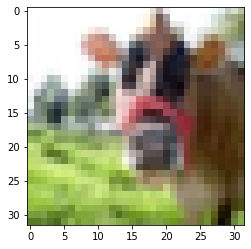

(32, 32, 3)


In [5]:
train_df = pd.read_csv(base_dir+'cifar100_train.csv')
train_df.head()
print_all_filenames(base_dir+"imgs",1)
img = show_image(base_dir, train_df, 0)
print(img.shape)


Son 50000 imagenes en train de 32x32x3 porque son RGB

In [6]:
path_to_check = "/content/x_train.txt"
x_train = get_cached_dataframe(path_to_check,train_df,img.shape,base_dir)

existe /content/x_train.txt


In [0]:
y_train = train_df['Label'].values

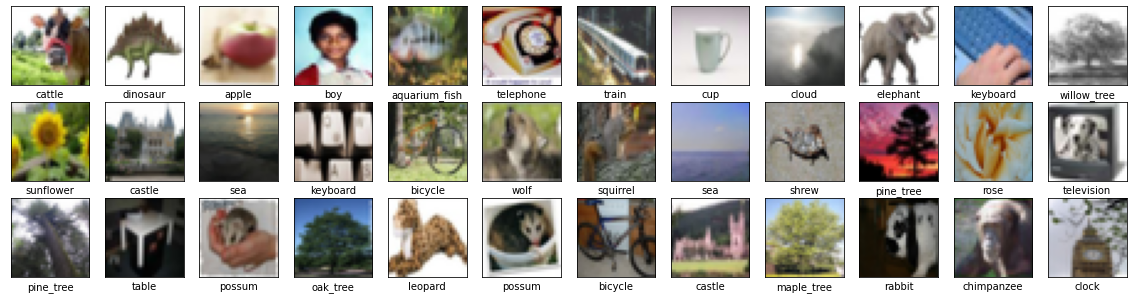

In [8]:
plot_images(x_train,y_train,36)

In [9]:
print(y_train.reshape(-1, 1))

[['cattle']
 ['dinosaur']
 ['apple']
 ...
 ['bear']
 ['beetle']
 ['shark']]


## One hot encoding
Clases:
gato, perro , llama

si en la primera imagen tengo un gato

[1,0,0]

si en la segunda hay un perro

[0,1,0] 

si en la tercera imagen tengo un llama

[0,0,1]


y asi...

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
y_categorical = enc.fit_transform(y_train.reshape(-1, 1))

print(y_categorical[0,])
print(y_categorical.shape)

  (0, 19)	1.0
(50000, 100)


Hay que ignorar el primer 0 de y_categorical[0,] dado que one hot encoder sirve para algo mas general pero en nuestro caso no nos importa.

En todos los y_categorical[i,] va a dar 0 lo que printeamos en primer columna y en la segunda nos da el numero de clase a la que pertenece


In [11]:
# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:])) #input: 32x32x3 #output: 3072x1
model.add(Dense(1000, activation='relu')) #input:3072x1    #ouput: 1000x1
model.add(Dense(512, activation='relu')) #input:1000x1 #output: 512x1
model.add(Dense(100, activation='softmax'))#input: 512 #output:100 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               51300     
Total params: 3,636,812
Trainable params: 3,636,812
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train.shape[1:]

(32, 32, 3)

In [13]:
32*32*3 # numero de entradas

3072

In [14]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Flatten(input_shape = x_train.shape[1:]),
       tf.keras.layers.Dense(1000, activation='relu'),
       tf.keras.layers.Dense(512, activation='relu'),
       tf.keras.layers.Dense(100, activation='softmax')])

In [27]:
with strategy.scope():
    model = create_model()
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Exception ignored in: <bound method IteratorResourceDeleter.__del__ of <tensorflow.python.data.ops.iterator_ops.IteratorResourceDeleter object at 0x7f252ad3bfd0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 538, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1148, in delete_iterator
    _ops.raise_from_not_ok_status(e, name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 6653, in raise_from_not_ok_status
    six.raise_from(core._status_to_exception(e.code, message), None)
  File "<string>", line 3, in raise_from
tensorflow.python.framework.errors_impl.NotFoundError: No registered 'Identity' OpKernel for 'TPU' devices compatible with node {{node Identity}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_UINT8
	.  Registered

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               51300     
Total params: 3,636,812
Trainable params: 3,636,812
Non-trainable params: 0
_________________________________________________________________


In [0]:
#print(x_train)

In [24]:
x_train_nuevo = x_train.astype(np.uint32)
model.fit(x_train_nuevo, y_categorical, batch_size=32, epochs=20,  verbose=2, shuffle=True)

uint32


NotFoundError: ignored